In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.drop(['Unnamed: 0'],axis=1,inplace=True)
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.corr()>0.5

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,True,False,False,False,False,False,False,False,True,True,False,False,False
ZN,False,True,False,False,False,False,False,True,False,False,False,False,False
INDUS,False,False,True,False,True,False,True,False,True,True,False,True,False
CHAS,False,False,False,True,False,False,False,False,False,False,False,False,False
NOX,False,False,True,False,True,False,True,False,True,True,False,True,False
RM,False,False,False,False,False,True,False,False,False,False,False,False,True
AGE,False,False,True,False,True,False,True,False,False,True,False,True,False
DIS,False,True,False,False,False,False,False,True,False,False,False,False,False
RAD,True,False,True,False,True,False,False,False,True,True,False,False,False
TAX,True,False,True,False,True,False,True,False,True,True,False,True,False


In [5]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Text(0.5, 1.0, 'Median Value of Owner occupied Homes')

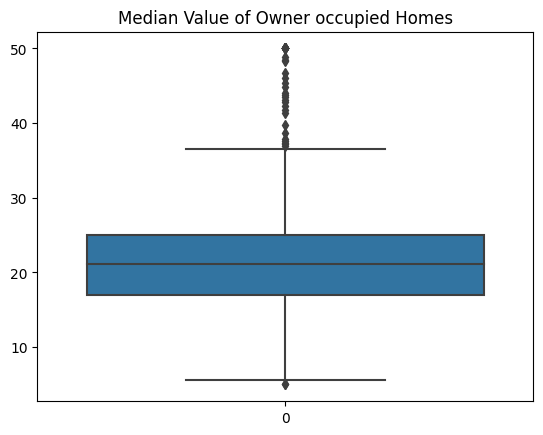

In [7]:
sns.boxplot(boston_df['MEDV']).set_title('Median Value of Owner occupied Homes')

<Axes: xlabel='CHAS', ylabel='count'>

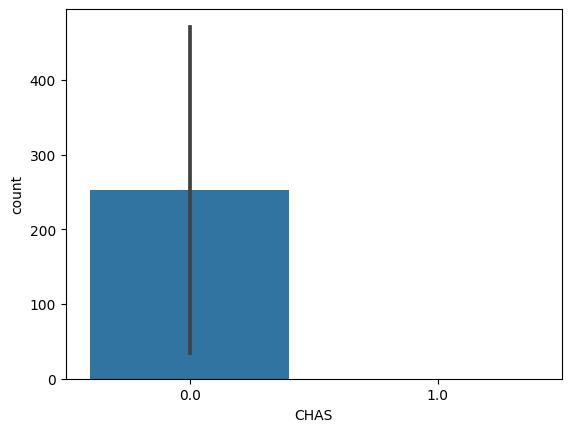

In [8]:
val=boston_df['CHAS'].value_counts()
sns.barplot(data=boston_df,x='CHAS',y=val)


In [16]:
age=pd.cut(boston_df['AGE'],bins=[2,35,70,100],
           include_lowest=True,
           labels=['35 years and younger','between 35 and 70 years','70 years and older'])
boston_df['AGE_RANGE']=age

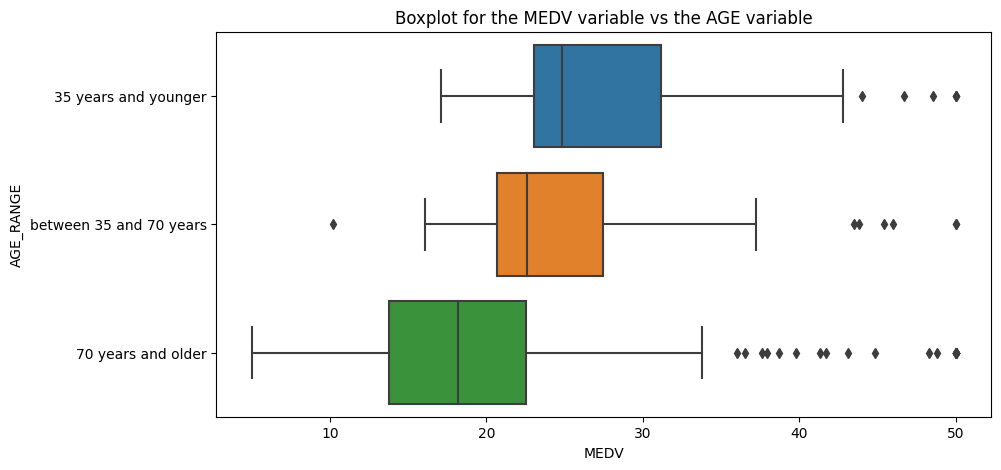

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV, y=boston_df.AGE_RANGE)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

<Axes: xlabel='NOX', ylabel='INDUS'>

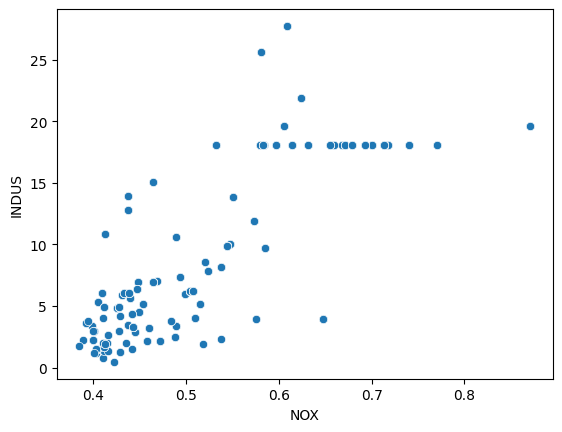

In [12]:
sns.scatterplot(data=boston_df,x='NOX',y='INDUS')

<Axes: xlabel='PTRATIO', ylabel='Count'>

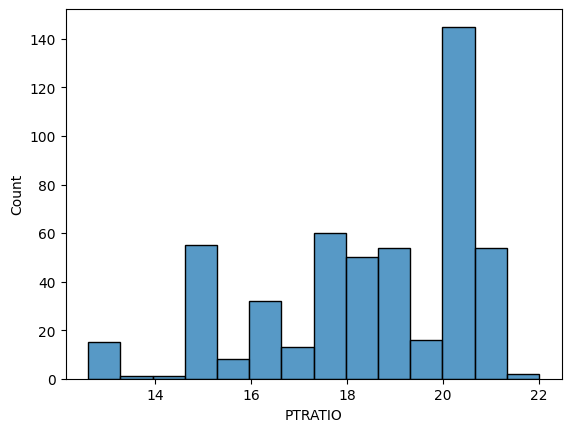

In [13]:
sns.histplot(boston_df['PTRATIO'])

1) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [14]:
import scipy.stats as stats
a=boston_df[boston_df['CHAS']==1]
b=boston_df[boston_df['CHAS']==0]
stats.ttest_ind(a['MEDV'],b['MEDV'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [20]:
low=boston_df[boston_df['AGE_RANGE']=='35 years and younger']['MEDV']
med=boston_df[boston_df['AGE_RANGE']=='between 35 and 70 years']['MEDV']
high=boston_df[boston_df['AGE_RANGE']=='70 years and older']['MEDV']
stats.f_oneway(low,med,high,axis=0)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

3) What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [21]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'AGE_RANGE'],
      dtype='object')

In [23]:
import statsmodels.api as sm
x=boston_df.DIS
y=boston_df.MEDV
x=sm.add_constant(x)
res= sm.OLS(y,x).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        21:06:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
np.sqrt(0.062)

0.24899799195977465

Correlation

In [34]:
t=boston_df[boston_df.columns[:-1]].corr()
t

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


<Axes: >

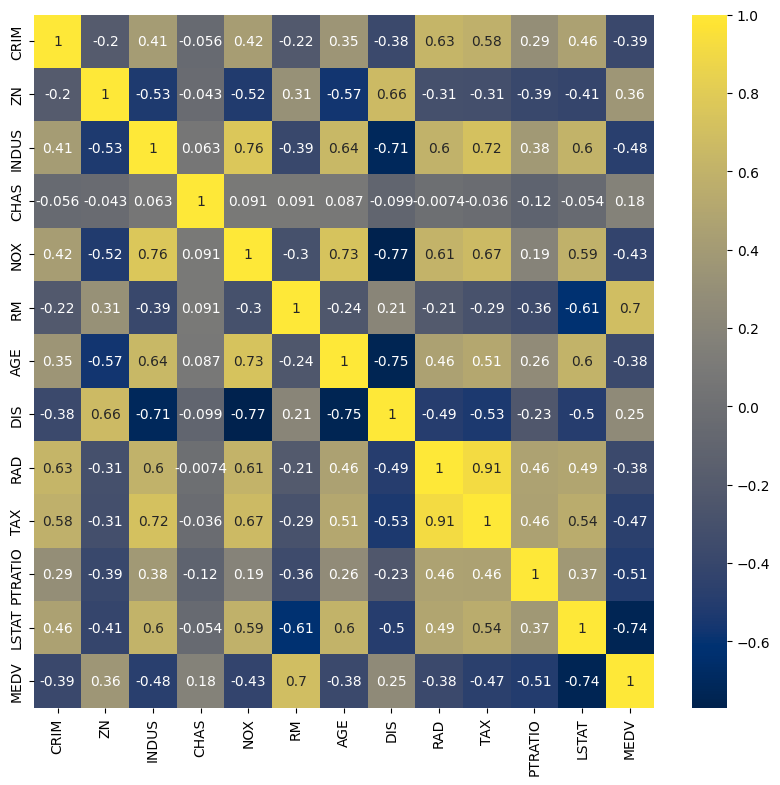

In [50]:
plt.figure(figsize=(10,9))
sns.heatmap(data=t,annot=True,cmap='cividis')